# 무신사 데이터 분석 및 머신러닝 프로젝트

### 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
  
plt.style.use('seaborn')
sns.set(font_scale=2.5)

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

# 데이터 읽기

In [2]:
df_train = pd.read_csv("musinsa_final.csv")
#df_train = df_train.sort_values("TOTAL_SELL", ascending=False)
#title컬럼을 기준으로 중복 값 제거
df_train = df_train.drop_duplicates(['TITLE'])
df_train

,index,TITLE,BRAND,SEASON,SEX,POPULARITY,BUCKET,TOTAL_SELL,LIKE_,REVIEW,SATISFACTION,DELIVERY_DATE,PRICE,SALE,CATEGORY_,IMG_URL
0,0,테이퍼드 히든 밴딩 크롭 슬랙스 [블랙]|TAPERED HIDDEN BANDING ...,MUSINSA STANDARD,2019ALL/,남,348380.0,28631.0,10000.0,12150.0,8845.0,94.0,2.0,31900.0,NaN,수트 팬츠/슬랙스,https://image.msscdn.net/images/goods_img/2019...
1,1,12/26 배송 캐시미어20 오버핏 더블 롱 코트 (블랙)|캐시미어20 오버핏 더블...,COOR,2019F/W/,남,170611.0,7235.0,3116.0,3617.0,2441.0,95.0,2.0,256800.0,20.0,겨울 기타 코트,https://image.msscdn.net/images/goods_img/2017...
2,2,Tydi crop jeans #0064|Tydi crop jeans #0064,FATALISM,2019F/W/,남,272331.0,16828.0,18525.0,10969.0,8960.0,94.0,2.0,86400.0,10.0,데님 팬츠,https://image.msscdn.net/images/goods_img/2017...
3,3,삼성 블루투스 이어폰 갤럭시버즈 SM-R170|삼성 블루투스 이어폰 갤럭시버즈 SM...,SAMSUNG ELECTRONICS,NaN,라이프,74163.0,7716.0,3305.0,1712.0,909.0,96.0,2.0,159500.0,NaN,이어폰,https://image.msscdn.net/images/goods_img/2019...
4,4,공용 알래스카 에어 프리미엄 푸퍼 점퍼 _ PHZ4JP3220GR|공용 알래스카 에...,POLHAM,2019F/W/,남,206928.0,6086.0,2286.0,3472.0,611.0,95.0,2.0,139000.0,30.0,숏 패딩/숏 헤비 아우터,https://image.msscdn.net/images/goods_img/2019...
5,5,M/G SMALL SIGN LOGO HOODIE GRAY|M/G SMALL SIGN...,MARK GONZALES,NaN,남,48557.0,6176.0,NaN,3354.0,2042.0,94.0,3.0,45500.0,30.0,후드 스웨트셔츠/후드 집업,https://image.msscdn.net/images/goods_img/2018...
6,6,캐시미어 블렌드 오버사이즈 더블 코트 [블랙]|CASHMERE BLEND OVERS...,MUSINSA STANDARD,2019ALL/,남,101255.0,4519.0,1000.0,2200.0,1703.0,95.0,2.0,143900.0,10.0,겨울 기타 코트,https://image.msscdn.net/images/goods_img/2018...
7,7,[세트] 하프 폴라 니트 티셔츠|[SET] Half Pola Knit T-Shirt,ESN,NaN,남,368097.0,38074.0,71638.0,23459.0,27760.0,92.0,2.0,32760.0,58.0,니트/스웨터/카디건,https://image.msscdn.net/images/goods_img/2017...
8,8,프리미엄 헝가리 구스 다운 007 숏푸퍼 블랙|프리미엄 헝가리 구스 다운 007 숏...,COVERNAT,2019F/W/,남,383013.0,7557.0,NaN,3154.0,998.0,94.0,3.0,154700.0,35.0,숏 패딩/숏 헤비 아우터,https://image.msscdn.net/images/goods_img/2019...
9,9,[무신사 단독특가] FW 미니멀 스탠다드 카고조거 슬랙스|[무신사 단독특가] FW ...,SEVENSELAH,NaN,남,158629.0,12753.0,12177.0,6327.0,2249.0,93.0,2.0,57900.0,35.0,트레이닝/조거 팬츠,https://image.msscdn.net/images/goods_img/2019...


In [3]:
df_train.describe()

,index,POPULARITY,BUCKET,TOTAL_SELL,LIKE_,REVIEW,SATISFACTION,DELIVERY_DATE,PRICE,SALE
count,43311.000000,43310.000000,42362.000000,7676.000000,37462.000000,15600.000000,43310.000000,42917.000000,4.331000e+04,23612.000000
mean,26115.588349,1399.053198,150.671569,477.658155,110.562036,370.021026,90.371277,1.962206,1.283339e+05,33.723827
std,14261.416959,10468.865875,1060.262019,2354.779404,703.722698,2247.306914,13.323649,0.747174,1.841422e+05,15.502748
min,0.000000,6.000000,0.000000,10.000000,1.000000,0.000000,20.000000,0.000000,5.000000e+03,3.000000
25%,13954.500000,49.000000,3.000000,15.000000,3.000000,2.000000,80.000000,2.000000,4.550000e+04,20.000000
50%,26526.000000,95.000000,10.000000,29.000000,10.000000,6.000000,95.000000,2.000000,7.200000e+04,30.000000
75%,38433.500000,295.000000,37.000000,96.000000,32.000000,27.000000,100.000000,2.000000,1.399000e+05,43.000000
max,50126.000000,812749.000000,44356.000000,71638.000000,25964.000000,43588.000000,100.000000,14.000000,5.391000e+06,90.000000


In [4]:
#널 값의 비율을 알아본다
df_train.isnull().sum()/len(df_train)

index            0.000000
TITLE            0.000023
BRAND            0.000023
SEASON           0.398259
SEX              0.000023
POPULARITY       0.000023
BUCKET           0.021911
TOTAL_SELL       0.822770
LIKE_            0.135047
REVIEW           0.639814
SATISFACTION     0.000023
DELIVERY_DATE    0.009097
PRICE            0.000023
SALE             0.454827
CATEGORY_        0.000023
IMG_URL          0.000023
dtype: float64

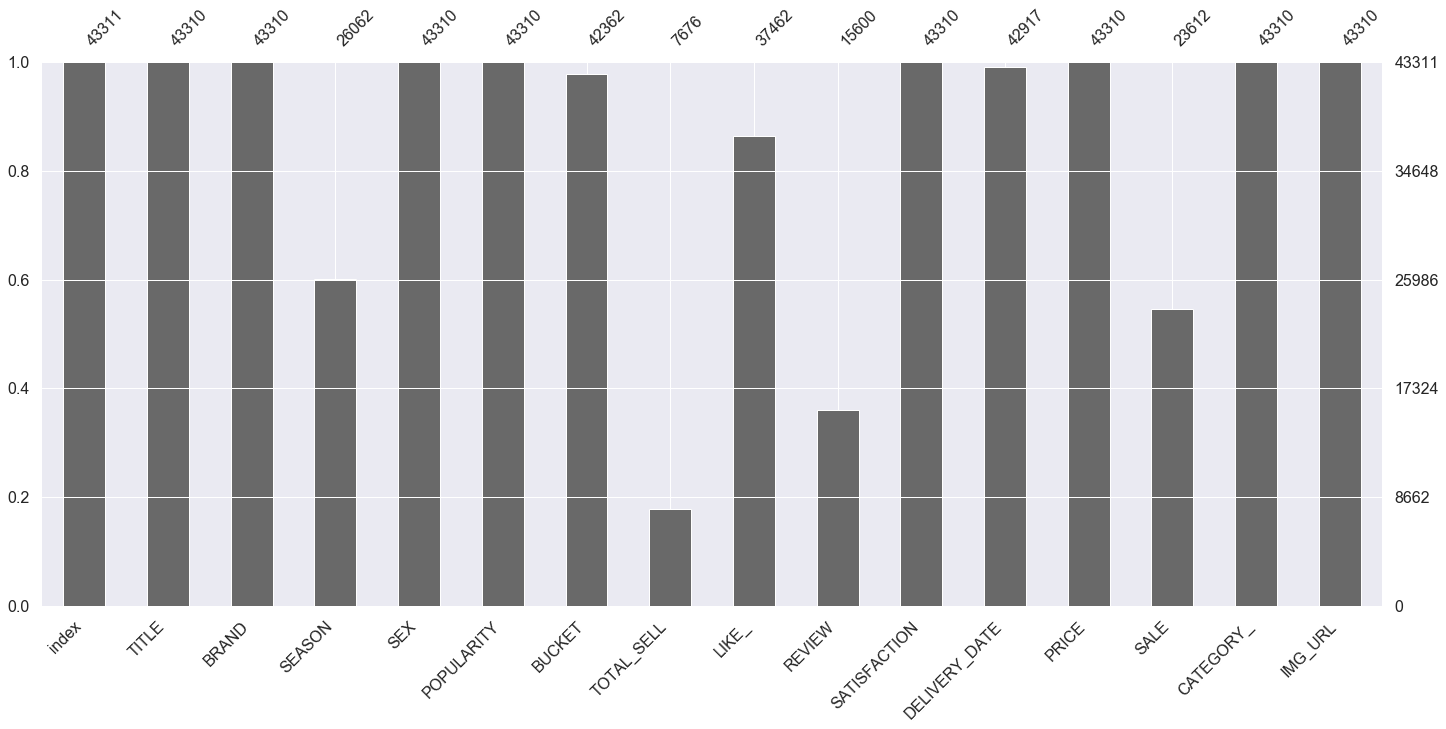

In [5]:
import missingno as msno
msno.bar(df=df_train)

In [6]:
#SALE의 null값은 할인률이 없는, 즉 할인하지 않는다는 의미이므로 0%로 바꿔준다
df_train['SALE'] = np.where(df_train['SALE'].isnull() ,0 , df_train['SALE'])
df_train

,index,TITLE,BRAND,SEASON,SEX,POPULARITY,BUCKET,TOTAL_SELL,LIKE_,REVIEW,SATISFACTION,DELIVERY_DATE,PRICE,SALE,CATEGORY_,IMG_URL
0,0,테이퍼드 히든 밴딩 크롭 슬랙스 [블랙]|TAPERED HIDDEN BANDING ...,MUSINSA STANDARD,2019ALL/,남,348380.0,28631.0,10000.0,12150.0,8845.0,94.0,2.0,31900.0,0.0,수트 팬츠/슬랙스,https://image.msscdn.net/images/goods_img/2019...
1,1,12/26 배송 캐시미어20 오버핏 더블 롱 코트 (블랙)|캐시미어20 오버핏 더블...,COOR,2019F/W/,남,170611.0,7235.0,3116.0,3617.0,2441.0,95.0,2.0,256800.0,20.0,겨울 기타 코트,https://image.msscdn.net/images/goods_img/2017...
2,2,Tydi crop jeans #0064|Tydi crop jeans #0064,FATALISM,2019F/W/,남,272331.0,16828.0,18525.0,10969.0,8960.0,94.0,2.0,86400.0,10.0,데님 팬츠,https://image.msscdn.net/images/goods_img/2017...
3,3,삼성 블루투스 이어폰 갤럭시버즈 SM-R170|삼성 블루투스 이어폰 갤럭시버즈 SM...,SAMSUNG ELECTRONICS,NaN,라이프,74163.0,7716.0,3305.0,1712.0,909.0,96.0,2.0,159500.0,0.0,이어폰,https://image.msscdn.net/images/goods_img/2019...
4,4,공용 알래스카 에어 프리미엄 푸퍼 점퍼 _ PHZ4JP3220GR|공용 알래스카 에...,POLHAM,2019F/W/,남,206928.0,6086.0,2286.0,3472.0,611.0,95.0,2.0,139000.0,30.0,숏 패딩/숏 헤비 아우터,https://image.msscdn.net/images/goods_img/2019...
5,5,M/G SMALL SIGN LOGO HOODIE GRAY|M/G SMALL SIGN...,MARK GONZALES,NaN,남,48557.0,6176.0,NaN,3354.0,2042.0,94.0,3.0,45500.0,30.0,후드 스웨트셔츠/후드 집업,https://image.msscdn.net/images/goods_img/2018...
6,6,캐시미어 블렌드 오버사이즈 더블 코트 [블랙]|CASHMERE BLEND OVERS...,MUSINSA STANDARD,2019ALL/,남,101255.0,4519.0,1000.0,2200.0,1703.0,95.0,2.0,143900.0,10.0,겨울 기타 코트,https://image.msscdn.net/images/goods_img/2018...
7,7,[세트] 하프 폴라 니트 티셔츠|[SET] Half Pola Knit T-Shirt,ESN,NaN,남,368097.0,38074.0,71638.0,23459.0,27760.0,92.0,2.0,32760.0,58.0,니트/스웨터/카디건,https://image.msscdn.net/images/goods_img/2017...
8,8,프리미엄 헝가리 구스 다운 007 숏푸퍼 블랙|프리미엄 헝가리 구스 다운 007 숏...,COVERNAT,2019F/W/,남,383013.0,7557.0,NaN,3154.0,998.0,94.0,3.0,154700.0,35.0,숏 패딩/숏 헤비 아우터,https://image.msscdn.net/images/goods_img/2019...
9,9,[무신사 단독특가] FW 미니멀 스탠다드 카고조거 슬랙스|[무신사 단독특가] FW ...,SEVENSELAH,NaN,남,158629.0,12753.0,12177.0,6327.0,2249.0,93.0,2.0,57900.0,35.0,트레이닝/조거 팬츠,https://image.msscdn.net/images/goods_img/2019...


In [7]:
#LIKE의 null값은 좋아요를 1개도 받지 못했다는 의미이므로 0개로 바꿔준다
df_train['LIKE_'] = np.where(df_train['LIKE_'].isnull() ,0 , df_train['LIKE_'])
df_train

,index,TITLE,BRAND,SEASON,SEX,POPULARITY,BUCKET,TOTAL_SELL,LIKE_,REVIEW,SATISFACTION,DELIVERY_DATE,PRICE,SALE,CATEGORY_,IMG_URL
0,0,테이퍼드 히든 밴딩 크롭 슬랙스 [블랙]|TAPERED HIDDEN BANDING ...,MUSINSA STANDARD,2019ALL/,남,348380.0,28631.0,10000.0,12150.0,8845.0,94.0,2.0,31900.0,0.0,수트 팬츠/슬랙스,https://image.msscdn.net/images/goods_img/2019...
1,1,12/26 배송 캐시미어20 오버핏 더블 롱 코트 (블랙)|캐시미어20 오버핏 더블...,COOR,2019F/W/,남,170611.0,7235.0,3116.0,3617.0,2441.0,95.0,2.0,256800.0,20.0,겨울 기타 코트,https://image.msscdn.net/images/goods_img/2017...
2,2,Tydi crop jeans #0064|Tydi crop jeans #0064,FATALISM,2019F/W/,남,272331.0,16828.0,18525.0,10969.0,8960.0,94.0,2.0,86400.0,10.0,데님 팬츠,https://image.msscdn.net/images/goods_img/2017...
3,3,삼성 블루투스 이어폰 갤럭시버즈 SM-R170|삼성 블루투스 이어폰 갤럭시버즈 SM...,SAMSUNG ELECTRONICS,NaN,라이프,74163.0,7716.0,3305.0,1712.0,909.0,96.0,2.0,159500.0,0.0,이어폰,https://image.msscdn.net/images/goods_img/2019...
4,4,공용 알래스카 에어 프리미엄 푸퍼 점퍼 _ PHZ4JP3220GR|공용 알래스카 에...,POLHAM,2019F/W/,남,206928.0,6086.0,2286.0,3472.0,611.0,95.0,2.0,139000.0,30.0,숏 패딩/숏 헤비 아우터,https://image.msscdn.net/images/goods_img/2019...
5,5,M/G SMALL SIGN LOGO HOODIE GRAY|M/G SMALL SIGN...,MARK GONZALES,NaN,남,48557.0,6176.0,NaN,3354.0,2042.0,94.0,3.0,45500.0,30.0,후드 스웨트셔츠/후드 집업,https://image.msscdn.net/images/goods_img/2018...
6,6,캐시미어 블렌드 오버사이즈 더블 코트 [블랙]|CASHMERE BLEND OVERS...,MUSINSA STANDARD,2019ALL/,남,101255.0,4519.0,1000.0,2200.0,1703.0,95.0,2.0,143900.0,10.0,겨울 기타 코트,https://image.msscdn.net/images/goods_img/2018...
7,7,[세트] 하프 폴라 니트 티셔츠|[SET] Half Pola Knit T-Shirt,ESN,NaN,남,368097.0,38074.0,71638.0,23459.0,27760.0,92.0,2.0,32760.0,58.0,니트/스웨터/카디건,https://image.msscdn.net/images/goods_img/2017...
8,8,프리미엄 헝가리 구스 다운 007 숏푸퍼 블랙|프리미엄 헝가리 구스 다운 007 숏...,COVERNAT,2019F/W/,남,383013.0,7557.0,NaN,3154.0,998.0,94.0,3.0,154700.0,35.0,숏 패딩/숏 헤비 아우터,https://image.msscdn.net/images/goods_img/2019...
9,9,[무신사 단독특가] FW 미니멀 스탠다드 카고조거 슬랙스|[무신사 단독특가] FW ...,SEVENSELAH,NaN,남,158629.0,12753.0,12177.0,6327.0,2249.0,93.0,2.0,57900.0,35.0,트레이닝/조거 팬츠,https://image.msscdn.net/images/goods_img/2019...


In [8]:
# season, review 항목은 사용하지 않기로 한다.
df_train = df_train.drop(['SEASON' , 'REVIEW'] , axis=1)
df_train

,index,TITLE,BRAND,SEX,POPULARITY,BUCKET,TOTAL_SELL,LIKE_,SATISFACTION,DELIVERY_DATE,PRICE,SALE,CATEGORY_,IMG_URL
0,0,테이퍼드 히든 밴딩 크롭 슬랙스 [블랙]|TAPERED HIDDEN BANDING ...,MUSINSA STANDARD,남,348380.0,28631.0,10000.0,12150.0,94.0,2.0,31900.0,0.0,수트 팬츠/슬랙스,https://image.msscdn.net/images/goods_img/2019...
1,1,12/26 배송 캐시미어20 오버핏 더블 롱 코트 (블랙)|캐시미어20 오버핏 더블...,COOR,남,170611.0,7235.0,3116.0,3617.0,95.0,2.0,256800.0,20.0,겨울 기타 코트,https://image.msscdn.net/images/goods_img/2017...
2,2,Tydi crop jeans #0064|Tydi crop jeans #0064,FATALISM,남,272331.0,16828.0,18525.0,10969.0,94.0,2.0,86400.0,10.0,데님 팬츠,https://image.msscdn.net/images/goods_img/2017...
3,3,삼성 블루투스 이어폰 갤럭시버즈 SM-R170|삼성 블루투스 이어폰 갤럭시버즈 SM...,SAMSUNG ELECTRONICS,라이프,74163.0,7716.0,3305.0,1712.0,96.0,2.0,159500.0,0.0,이어폰,https://image.msscdn.net/images/goods_img/2019...
4,4,공용 알래스카 에어 프리미엄 푸퍼 점퍼 _ PHZ4JP3220GR|공용 알래스카 에...,POLHAM,남,206928.0,6086.0,2286.0,3472.0,95.0,2.0,139000.0,30.0,숏 패딩/숏 헤비 아우터,https://image.msscdn.net/images/goods_img/2019...
5,5,M/G SMALL SIGN LOGO HOODIE GRAY|M/G SMALL SIGN...,MARK GONZALES,남,48557.0,6176.0,NaN,3354.0,94.0,3.0,45500.0,30.0,후드 스웨트셔츠/후드 집업,https://image.msscdn.net/images/goods_img/2018...
6,6,캐시미어 블렌드 오버사이즈 더블 코트 [블랙]|CASHMERE BLEND OVERS...,MUSINSA STANDARD,남,101255.0,4519.0,1000.0,2200.0,95.0,2.0,143900.0,10.0,겨울 기타 코트,https://image.msscdn.net/images/goods_img/2018...
7,7,[세트] 하프 폴라 니트 티셔츠|[SET] Half Pola Knit T-Shirt,ESN,남,368097.0,38074.0,71638.0,23459.0,92.0,2.0,32760.0,58.0,니트/스웨터/카디건,https://image.msscdn.net/images/goods_img/2017...
8,8,프리미엄 헝가리 구스 다운 007 숏푸퍼 블랙|프리미엄 헝가리 구스 다운 007 숏...,COVERNAT,남,383013.0,7557.0,NaN,3154.0,94.0,3.0,154700.0,35.0,숏 패딩/숏 헤비 아우터,https://image.msscdn.net/images/goods_img/2019...
9,9,[무신사 단독특가] FW 미니멀 스탠다드 카고조거 슬랙스|[무신사 단독특가] FW ...,SEVENSELAH,남,158629.0,12753.0,12177.0,6327.0,93.0,2.0,57900.0,35.0,트레이닝/조거 팬츠,https://image.msscdn.net/images/goods_img/2019...


In [9]:
#null값이 총 row의 10%를 넘어버리면 분석에 방해를 준다
#y축인 TOTAL_SELL 값의 null 값이 40000이 되므로 삭제한다.
df_train = df_train.dropna()
df_train

,index,TITLE,BRAND,SEX,POPULARITY,BUCKET,TOTAL_SELL,LIKE_,SATISFACTION,DELIVERY_DATE,PRICE,SALE,CATEGORY_,IMG_URL
0,0,테이퍼드 히든 밴딩 크롭 슬랙스 [블랙]|TAPERED HIDDEN BANDING ...,MUSINSA STANDARD,남,348380.0,28631.0,10000.0,12150.0,94.0,2.0,31900.0,0.0,수트 팬츠/슬랙스,https://image.msscdn.net/images/goods_img/2019...
1,1,12/26 배송 캐시미어20 오버핏 더블 롱 코트 (블랙)|캐시미어20 오버핏 더블...,COOR,남,170611.0,7235.0,3116.0,3617.0,95.0,2.0,256800.0,20.0,겨울 기타 코트,https://image.msscdn.net/images/goods_img/2017...
2,2,Tydi crop jeans #0064|Tydi crop jeans #0064,FATALISM,남,272331.0,16828.0,18525.0,10969.0,94.0,2.0,86400.0,10.0,데님 팬츠,https://image.msscdn.net/images/goods_img/2017...
3,3,삼성 블루투스 이어폰 갤럭시버즈 SM-R170|삼성 블루투스 이어폰 갤럭시버즈 SM...,SAMSUNG ELECTRONICS,라이프,74163.0,7716.0,3305.0,1712.0,96.0,2.0,159500.0,0.0,이어폰,https://image.msscdn.net/images/goods_img/2019...
4,4,공용 알래스카 에어 프리미엄 푸퍼 점퍼 _ PHZ4JP3220GR|공용 알래스카 에...,POLHAM,남,206928.0,6086.0,2286.0,3472.0,95.0,2.0,139000.0,30.0,숏 패딩/숏 헤비 아우터,https://image.msscdn.net/images/goods_img/2019...
6,6,캐시미어 블렌드 오버사이즈 더블 코트 [블랙]|CASHMERE BLEND OVERS...,MUSINSA STANDARD,남,101255.0,4519.0,1000.0,2200.0,95.0,2.0,143900.0,10.0,겨울 기타 코트,https://image.msscdn.net/images/goods_img/2018...
7,7,[세트] 하프 폴라 니트 티셔츠|[SET] Half Pola Knit T-Shirt,ESN,남,368097.0,38074.0,71638.0,23459.0,92.0,2.0,32760.0,58.0,니트/스웨터/카디건,https://image.msscdn.net/images/goods_img/2017...
9,9,[무신사 단독특가] FW 미니멀 스탠다드 카고조거 슬랙스|[무신사 단독특가] FW ...,SEVENSELAH,남,158629.0,12753.0,12177.0,6327.0,93.0,2.0,57900.0,35.0,트레이닝/조거 팬츠,https://image.msscdn.net/images/goods_img/2019...
10,10,CARGO STRING PANTS _ BLACK|CARGO STRING PANTS ...,FRIZMWORKS,남,13882.0,3696.0,2803.0,2727.0,92.0,3.0,62000.0,0.0,트레이닝/조거 팬츠,https://image.msscdn.net/images/goods_img/2019...
11,11,12/19 배송 오버사이즈 무스탕 자켓 [GREYISH BEIGE]|OVERSIZE...,DRAW FIT,남,74534.0,3336.0,1053.0,1858.0,85.0,2.0,158400.0,20.0,레더/라이더스 재킷,https://image.msscdn.net/images/goods_img/2019...


# 타겟값 분류

> 랭킹 페이지에서 10페이지 이하에 들어갈수록 상품의 판매량이 좋아질 것으로 예상한다. 따라서, 중복 값 제거 후의 인덱스 값(랭킹 순위)에 따라 800 이하일 경우를 1로, 이상일 경우를 0으로 놓는다.

In [10]:
# 상위 페이지를 나타내는 칼럼 'first_page' 생성, 0과 1로 나누어진다.
df_train['FIRST_PAGE'] = 0
df_train.head()

,index,TITLE,BRAND,SEX,POPULARITY,BUCKET,TOTAL_SELL,LIKE_,SATISFACTION,DELIVERY_DATE,PRICE,SALE,CATEGORY_,IMG_URL,FIRST_PAGE
0,0,테이퍼드 히든 밴딩 크롭 슬랙스 [블랙]|TAPERED HIDDEN BANDING ...,MUSINSA STANDARD,남,348380.0,28631.0,10000.0,12150.0,94.0,2.0,31900.0,0.0,수트 팬츠/슬랙스,https://image.msscdn.net/images/goods_img/2019...,0
1,1,12/26 배송 캐시미어20 오버핏 더블 롱 코트 (블랙)|캐시미어20 오버핏 더블...,COOR,남,170611.0,7235.0,3116.0,3617.0,95.0,2.0,256800.0,20.0,겨울 기타 코트,https://image.msscdn.net/images/goods_img/2017...,0
2,2,Tydi crop jeans #0064|Tydi crop jeans #0064,FATALISM,남,272331.0,16828.0,18525.0,10969.0,94.0,2.0,86400.0,10.0,데님 팬츠,https://image.msscdn.net/images/goods_img/2017...,0
3,3,삼성 블루투스 이어폰 갤럭시버즈 SM-R170|삼성 블루투스 이어폰 갤럭시버즈 SM...,SAMSUNG ELECTRONICS,라이프,74163.0,7716.0,3305.0,1712.0,96.0,2.0,159500.0,0.0,이어폰,https://image.msscdn.net/images/goods_img/2019...,0
4,4,공용 알래스카 에어 프리미엄 푸퍼 점퍼 _ PHZ4JP3220GR|공용 알래스카 에...,POLHAM,남,206928.0,6086.0,2286.0,3472.0,95.0,2.0,139000.0,30.0,숏 패딩/숏 헤비 아우터,https://image.msscdn.net/images/goods_img/2019...,0


In [11]:
# 1 페이지는 80개의 상품을 가지고 있기 때문에 상위 800개만 10페이지에 들어가게 된다.
df_train['FIRST_PAGE'][0:800] = 1
df_train.head()

,index,TITLE,BRAND,SEX,POPULARITY,BUCKET,TOTAL_SELL,LIKE_,SATISFACTION,DELIVERY_DATE,PRICE,SALE,CATEGORY_,IMG_URL,FIRST_PAGE
0,0,테이퍼드 히든 밴딩 크롭 슬랙스 [블랙]|TAPERED HIDDEN BANDING ...,MUSINSA STANDARD,남,348380.0,28631.0,10000.0,12150.0,94.0,2.0,31900.0,0.0,수트 팬츠/슬랙스,https://image.msscdn.net/images/goods_img/2019...,1
1,1,12/26 배송 캐시미어20 오버핏 더블 롱 코트 (블랙)|캐시미어20 오버핏 더블...,COOR,남,170611.0,7235.0,3116.0,3617.0,95.0,2.0,256800.0,20.0,겨울 기타 코트,https://image.msscdn.net/images/goods_img/2017...,1
2,2,Tydi crop jeans #0064|Tydi crop jeans #0064,FATALISM,남,272331.0,16828.0,18525.0,10969.0,94.0,2.0,86400.0,10.0,데님 팬츠,https://image.msscdn.net/images/goods_img/2017...,1
3,3,삼성 블루투스 이어폰 갤럭시버즈 SM-R170|삼성 블루투스 이어폰 갤럭시버즈 SM...,SAMSUNG ELECTRONICS,라이프,74163.0,7716.0,3305.0,1712.0,96.0,2.0,159500.0,0.0,이어폰,https://image.msscdn.net/images/goods_img/2019...,1
4,4,공용 알래스카 에어 프리미엄 푸퍼 점퍼 _ PHZ4JP3220GR|공용 알래스카 에...,POLHAM,남,206928.0,6086.0,2286.0,3472.0,95.0,2.0,139000.0,30.0,숏 패딩/숏 헤비 아우터,https://image.msscdn.net/images/goods_img/2019...,1


In [12]:
df_train['FIRST_PAGE'].value_counts()

0    6864
1     800
Name: FIRST_PAGE, dtype: int64

# 상관관계 분석

#  POPULARITY 컬럼과의 상관관계

In [13]:
#인기도의 범주를 설정하기 위해 전체를 8등분한다
df_train_POPULARITY = df_train.sort_values(['POPULARITY'], ascending = False)
POPULARITY_mean = pd.DataFrame(data=[df_train_POPULARITY['POPULARITY'][0:1000].min(),df_train_POPULARITY['POPULARITY'][1001:2000].min(),df_train_POPULARITY['POPULARITY'][2001:3000].min(),df_train_POPULARITY['POPULARITY'][3001:4000].min(),df_train_POPULARITY['POPULARITY'][4001:5000].min(),df_train_POPULARITY['POPULARITY'][5001:6000].min(),df_train_POPULARITY['POPULARITY'][6001:7000].min(),df_train_POPULARITY['POPULARITY'][7001:].min()], index=range(0,8), columns=['mins'])
display(pd.DataFrame(POPULARITY_mean))

,mins
0,6973.0
1,2502.0
2,1227.0
3,637.0
4,346.0
5,203.0
6,114.0
7,22.0


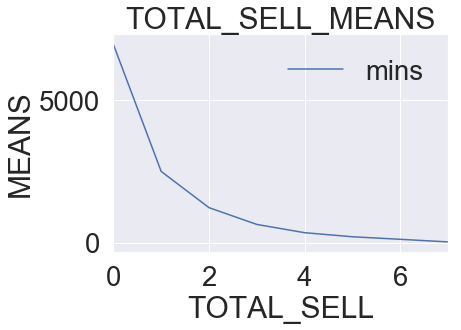

In [14]:
POPULARITY_mean.plot()
plt.title("TOTAL_SELL_MEANS")
plt.xlabel("TOTAL_SELL")
plt.ylabel("MEANS")
plt.show()

In [15]:
#인기도의 값이 여러개이기 때문에 범주를 만들어서 분석한다
#기준은 각 구간별의 mean의 값이다.
df_train['POPULARITY'] = np.where(df_train['POPULARITY'] <= 100, int('0'), df_train['POPULARITY'])
df_train['POPULARITY'] = np.where(df_train['POPULARITY'] > 7000, int('7'), df_train['POPULARITY'])
df_train['POPULARITY'] = np.where(df_train['POPULARITY'] > 2500, int('6'), df_train['POPULARITY'])
df_train['POPULARITY'] = np.where(df_train['POPULARITY'] > 1200, int('5'), df_train['POPULARITY'])
df_train['POPULARITY'] = np.where(df_train['POPULARITY'] > 650, int('4'), df_train['POPULARITY'])
df_train['POPULARITY'] = np.where(df_train['POPULARITY'] > 350, int('3'), df_train['POPULARITY'])
df_train['POPULARITY'] = np.where(df_train['POPULARITY'] > 200, int('2'), df_train['POPULARITY'])
df_train['POPULARITY'] = np.where(df_train['POPULARITY'] > 100, int('1'), df_train['POPULARITY'])

In [16]:
df_train[df_train['FIRST_PAGE'] == 1]['POPULARITY'].value_counts()

7.0    505
6.0    151
5.0     74
4.0     39
3.0     21
1.0      4
2.0      4
0.0      2
Name: POPULARITY, dtype: int64

In [17]:
#인기도 7.0의 0과 1의 분류를 보면 1 즉 첫번째 페이지에 더 많이 분포해 있는 것을 확인 할 수 있다.
pd.crosstab(df_train['POPULARITY'] , df_train['FIRST_PAGE'] , margins = True)

FIRST_PAGE,0,1,All
POPULARITY,,,
0.0,496,2,498
1.0,1147,4,1151
2.0,1036,4,1040
3.0,978,21,999
4.0,908,39,947
5.0,955,74,1029
6.0,851,151,1002
7.0,493,505,998
All,6864,800,7664


# BUCKET 컬럼과의 상관관계

In [18]:
#장바구니의 범주를 설정하기 위해 전체를 8등분한다
df_train_BUCKET = df_train.sort_values(['BUCKET'], ascending = False)
BUCKET_min = pd.DataFrame(data=[df_train_BUCKET['BUCKET'][0:1000].min(),df_train_BUCKET['BUCKET'][1001:2000].min(),df_train_BUCKET['BUCKET'][2001:3000].min(),df_train_BUCKET['BUCKET'][3001:4000].min(),df_train_BUCKET['BUCKET'][4001:5000].min(),df_train_BUCKET['BUCKET'][5001:6000].min(),df_train_BUCKET['BUCKET'][6001:7000].min(),df_train_BUCKET['BUCKET'][7001:].min()], index=range(0,8), columns=['mins'])
display(pd.DataFrame(BUCKET_min))

,mins
0,705.0
1,261.0
2,151.0
3,102.0
4,71.0
5,49.0
6,30.0
7,5.0


In [19]:
#인기도의 값이 여러개이기 때문에 범주를 만들어서 분석한다
#기준은 각 구간별의 min의 값이다.
df_train['BUCKET'] = np.where(df_train['BUCKET'] <= 10, int('0'), df_train['BUCKET'])
df_train['BUCKET'] = np.where(df_train['BUCKET'] > 700, int('7'), df_train['BUCKET'])
df_train['BUCKET'] = np.where(df_train['BUCKET'] > 250, int('6'), df_train['BUCKET'])
df_train['BUCKET'] = np.where(df_train['BUCKET'] > 150, int('5'), df_train['BUCKET'])
df_train['BUCKET'] = np.where(df_train['BUCKET'] > 100, int('4'), df_train['BUCKET'])
df_train['BUCKET'] = np.where(df_train['BUCKET'] > 70, int('3'), df_train['BUCKET'])
df_train['BUCKET'] = np.where(df_train['BUCKET'] > 50, int('2'), df_train['BUCKET'])
df_train['BUCKET'] = np.where(df_train['BUCKET'] > 10, int('1'), df_train['BUCKET'])

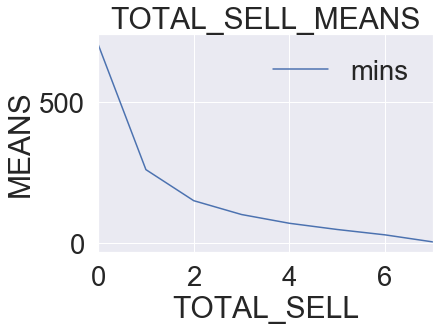

In [20]:
BUCKET_min.plot()
plt.title("TOTAL_SELL_MEANS")
plt.xlabel("TOTAL_SELL")
plt.ylabel("MEANS")
plt.show()

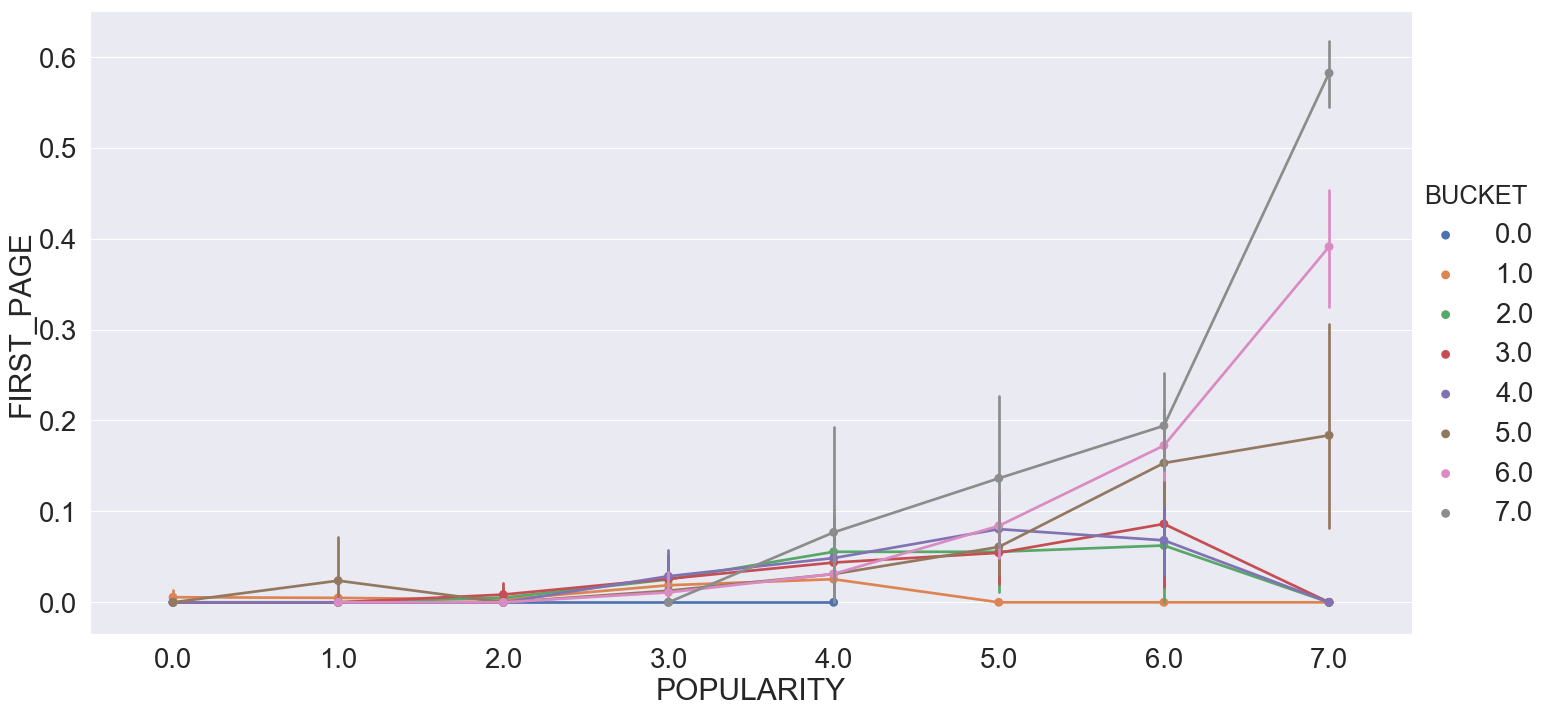

In [21]:
#장바구니 갯수에 대한 범주값 별로 FIRST_PAGE컬럼과 POPULARITY컬럼을 교차해서 그래프를 그림
sns.factorplot('POPULARITY' , 'FIRST_PAGE' , hue = 'BUCKET', data = df_train,size=10,aspect=2)

In [22]:
#좋아요 갯수의 범주를 설정하기 위해 전체를 8등분한다
df_train_LIKE = df_train.sort_values(['LIKE_'], ascending = False)
LIKE_min = pd.DataFrame(data=[df_train_LIKE['LIKE_'][0:1000].min(),df_train_LIKE['LIKE_'][1001:2000].min(),df_train_LIKE['LIKE_'][2001:3000].min(),df_train_LIKE['LIKE_'][3001:4000].min(),df_train_LIKE['LIKE_'][4001:5000].min(),df_train_LIKE['LIKE_'][5001:6000].min(),df_train_LIKE['LIKE_'][6001:7000].min(),df_train_LIKE['LIKE_'][7001:].min()], index=range(0,8), columns=['mins'])
display(pd.DataFrame(LIKE_min))

,mins
0,451.0
1,174.0
2,104.0
3,71.0
4,50.0
5,34.0
6,19.0
7,0.0


In [23]:
#좋아요의 값이 여러개이기 때문에 범주를 만들어서 분석한다
#기준은 각 구간별의 mean의 값이다.
df_train['LIKE_'] = np.where(df_train['LIKE_'] <= 20, int('0'), df_train['LIKE_'])
df_train['LIKE_'] = np.where(df_train['LIKE_'] > 450, int('7'), df_train['LIKE_'])
df_train['LIKE_'] = np.where(df_train['LIKE_'] > 200, int('6'), df_train['LIKE_'])
df_train['LIKE_'] = np.where(df_train['LIKE_'] > 100, int('5'), df_train['LIKE_'])
df_train['LIKE_'] = np.where(df_train['LIKE_'] > 70, int('4'), df_train['LIKE_'])
df_train['LIKE_'] = np.where(df_train['LIKE_'] > 50, int('3'), df_train['LIKE_'])
df_train['LIKE_'] = np.where(df_train['LIKE_'] > 35, int('2'), df_train['LIKE_'])
df_train['LIKE_'] = np.where(df_train['LIKE_'] > 20, int('1'), df_train['LIKE_'])



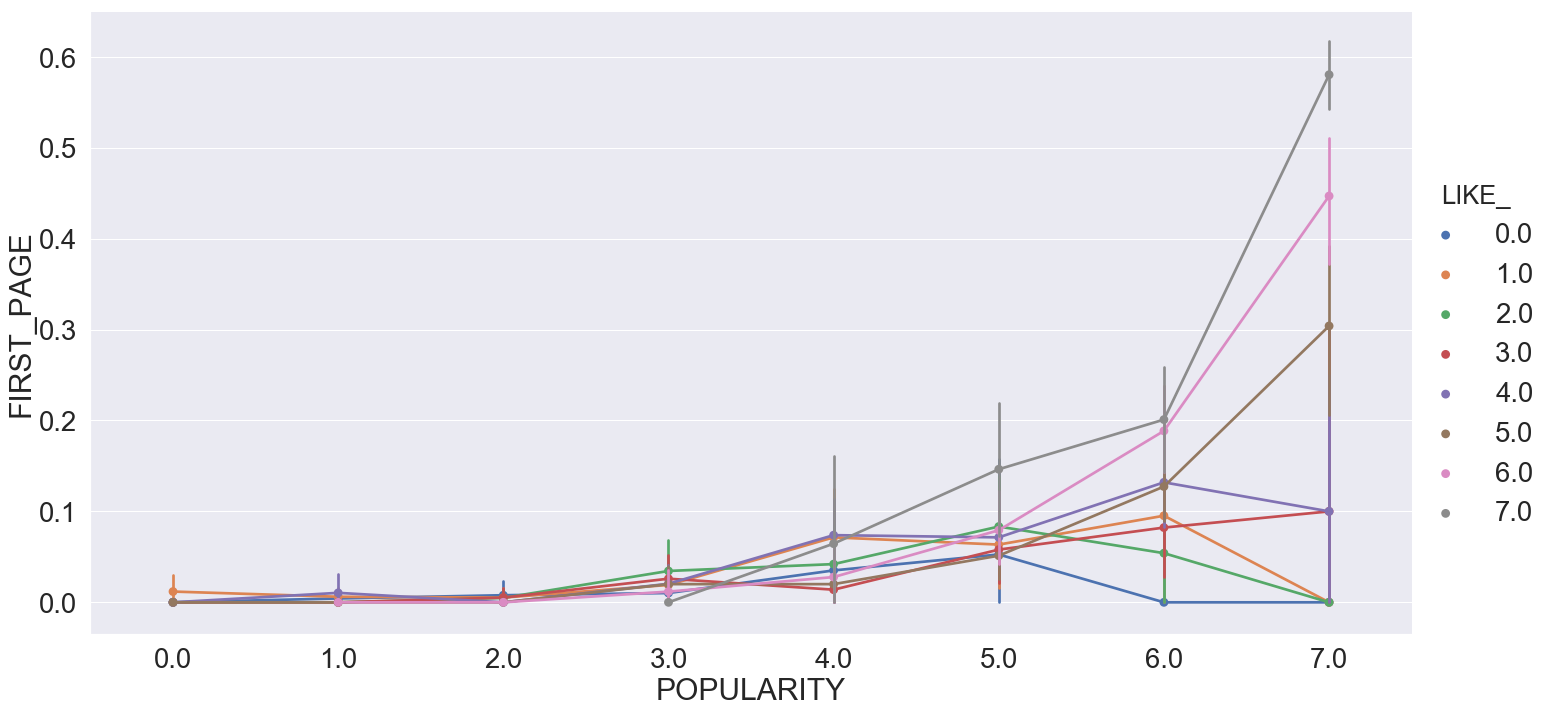

In [24]:
#장바구니 갯수에 대한 범주값 별로 FIRST_PAGE컬럼과 POPULARITY컬럼을 교차해서 그래프를 그림
sns.factorplot('POPULARITY' , 'FIRST_PAGE' , hue = 'LIKE_', data = df_train,size=10,aspect=2)

In [25]:
##총판매량의 범주를 설정하기 위해 전체를 8등분한다
df_train_TOTAL_SELL = df_train.sort_values(['TOTAL_SELL'], ascending = False)
TOTAL_SELL_min = pd.DataFrame(data=[df_train_TOTAL_SELL['TOTAL_SELL'][0:1000].min(),df_train_TOTAL_SELL['TOTAL_SELL'][1001:2000].min(),df_train_TOTAL_SELL['TOTAL_SELL'][2001:3000].min(),df_train_TOTAL_SELL['TOTAL_SELL'][3001:4000].min(),df_train_TOTAL_SELL['TOTAL_SELL'][4001:5000].min(),df_train_TOTAL_SELL['TOTAL_SELL'][5001:6000].min(),df_train_TOTAL_SELL['TOTAL_SELL'][6001:7000].min(),df_train_TOTAL_SELL['TOTAL_SELL'][7001:].min()], index=range(0,8), columns=['mins'])
display(pd.DataFrame(TOTAL_SELL_min))

,mins
0,383.0
1,89.0
2,43.0
3,27.0
4,19.0
5,14.0
6,11.0
7,10.0


In [26]:
#총판매량의 값이 여러개이기 때문에 범주를 만들어서 분석한다
df_train['TOTAL_SELL'] = np.where(df_train['TOTAL_SELL'] <= 10, int('0'), df_train['TOTAL_SELL'])
df_train['TOTAL_SELL'] = np.where(df_train['TOTAL_SELL'] > 380, int('7'), df_train['TOTAL_SELL'])
df_train['TOTAL_SELL'] = np.where(df_train['TOTAL_SELL'] > 90, int('6'), df_train['TOTAL_SELL'])
df_train['TOTAL_SELL'] = np.where(df_train['TOTAL_SELL'] > 40, int('5'), df_train['TOTAL_SELL'])
df_train['TOTAL_SELL'] = np.where(df_train['TOTAL_SELL'] > 30, int('4'), df_train['TOTAL_SELL'])
df_train['TOTAL_SELL'] = np.where(df_train['TOTAL_SELL'] > 20, int('3'), df_train['TOTAL_SELL'])
df_train['TOTAL_SELL'] = np.where(df_train['TOTAL_SELL'] > 15, int('2'), df_train['TOTAL_SELL'])
df_train['TOTAL_SELL'] = np.where(df_train['TOTAL_SELL'] > 10, int('1'), df_train['TOTAL_SELL'])

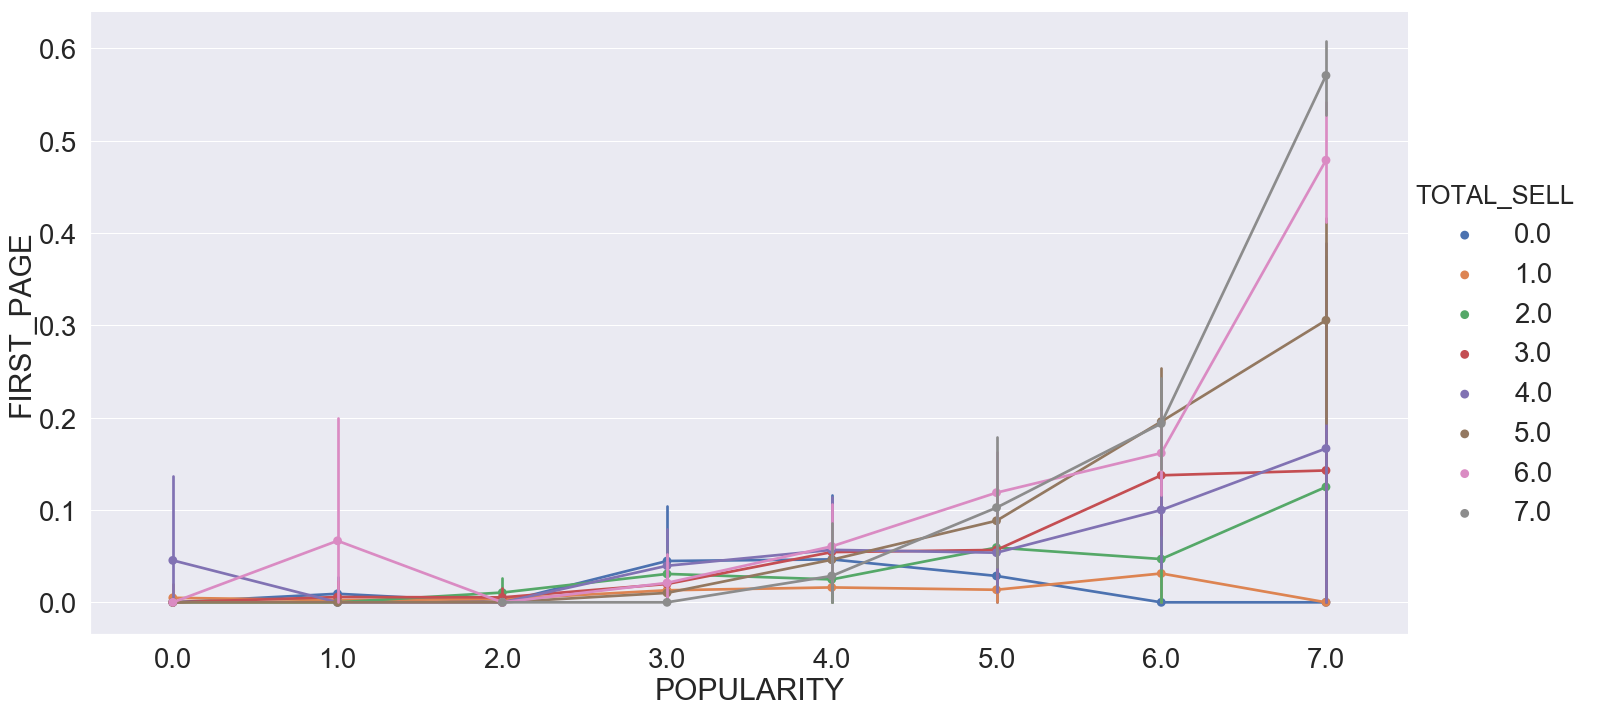

In [28]:
sns.factorplot('POPULARITY' , 'FIRST_PAGE' , hue = 'TOTAL_SELL', data = df_train,size=10,aspect=2)

In [29]:
df_train

,index,TITLE,BRAND,SEX,POPULARITY,BUCKET,TOTAL_SELL,LIKE_,SATISFACTION,DELIVERY_DATE,PRICE,SALE,CATEGORY_,IMG_URL,FIRST_PAGE
0,0,테이퍼드 히든 밴딩 크롭 슬랙스 [블랙]|TAPERED HIDDEN BANDING ...,MUSINSA STANDARD,남,7.0,7.0,7.0,7.0,94.0,2.0,31900.0,0.0,수트 팬츠/슬랙스,https://image.msscdn.net/images/goods_img/2019...,1
1,1,12/26 배송 캐시미어20 오버핏 더블 롱 코트 (블랙)|캐시미어20 오버핏 더블...,COOR,남,7.0,7.0,7.0,7.0,95.0,2.0,256800.0,20.0,겨울 기타 코트,https://image.msscdn.net/images/goods_img/2017...,1
2,2,Tydi crop jeans #0064|Tydi crop jeans #0064,FATALISM,남,7.0,7.0,7.0,7.0,94.0,2.0,86400.0,10.0,데님 팬츠,https://image.msscdn.net/images/goods_img/2017...,1
3,3,삼성 블루투스 이어폰 갤럭시버즈 SM-R170|삼성 블루투스 이어폰 갤럭시버즈 SM...,SAMSUNG ELECTRONICS,라이프,7.0,7.0,7.0,7.0,96.0,2.0,159500.0,0.0,이어폰,https://image.msscdn.net/images/goods_img/2019...,1
4,4,공용 알래스카 에어 프리미엄 푸퍼 점퍼 _ PHZ4JP3220GR|공용 알래스카 에...,POLHAM,남,7.0,7.0,7.0,7.0,95.0,2.0,139000.0,30.0,숏 패딩/숏 헤비 아우터,https://image.msscdn.net/images/goods_img/2019...,1
6,6,캐시미어 블렌드 오버사이즈 더블 코트 [블랙]|CASHMERE BLEND OVERS...,MUSINSA STANDARD,남,7.0,7.0,7.0,7.0,95.0,2.0,143900.0,10.0,겨울 기타 코트,https://image.msscdn.net/images/goods_img/2018...,1
7,7,[세트] 하프 폴라 니트 티셔츠|[SET] Half Pola Knit T-Shirt,ESN,남,7.0,7.0,7.0,7.0,92.0,2.0,32760.0,58.0,니트/스웨터/카디건,https://image.msscdn.net/images/goods_img/2017...,1
9,9,[무신사 단독특가] FW 미니멀 스탠다드 카고조거 슬랙스|[무신사 단독특가] FW ...,SEVENSELAH,남,7.0,7.0,7.0,7.0,93.0,2.0,57900.0,35.0,트레이닝/조거 팬츠,https://image.msscdn.net/images/goods_img/2019...,1
10,10,CARGO STRING PANTS _ BLACK|CARGO STRING PANTS ...,FRIZMWORKS,남,7.0,7.0,7.0,7.0,92.0,3.0,62000.0,0.0,트레이닝/조거 팬츠,https://image.msscdn.net/images/goods_img/2019...,1
11,11,12/19 배송 오버사이즈 무스탕 자켓 [GREYISH BEIGE]|OVERSIZE...,DRAW FIT,남,7.0,7.0,7.0,7.0,85.0,2.0,158400.0,20.0,레더/라이더스 재킷,https://image.msscdn.net/images/goods_img/2019...,1
